## Solve an elliptic equation using the ADI algorithm
* Using ADI 2
$$\alpha\frac{\partial^2f}{\partial x^2} + \alpha\frac{\partial^2f}{\partial y^2} = S.$$
$$\frac{\alpha}{\Delta x^2}(f_{i-1,j}-2f_{i,j}+f_{i+1,j}) + \frac{\alpha}{\Delta y^2}(f_{i,j-1}-2f_{i,j}+f_{i,j+1}) = S_{i,j}$$

* couple x direction
<font color='blue'>
$$\left(\frac{\alpha}{\Delta x^2}\right)f_{i-1,j}+\alpha\left(-\frac{2}{\Delta x^2}-\frac{2}{\Delta y^2}\right)f_{i,j}+\left(\frac{\alpha}{\Delta x^2}\right)f_{i+1,j} = S_{i,j} - \left(\frac{\alpha}{\Delta y^2}\right)f_{i,j-1} - \left(\frac{\alpha}{\Delta y^2}\right)f_{i,j+1}$$
</font>

* couple y direction
<font color='green'>
$$\left(\frac{\alpha}{\Delta y^2}\right)f_{i,j-1}+\alpha\left(-\frac{2}{\Delta x^2}-\frac{2}{\Delta y^2}\right)f_{i,j}+\left(\frac{\alpha}{\Delta y^2}\right)f_{i,j+1} = S_{i,j} - \left(\frac{\alpha}{\Delta x^2}\right)f_{i-1,j} - \left(\frac{\alpha}{\Delta x^2}\right)f_{i+1,j}$$
</font>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ix= np.ix_

In [38]:
nx = 42
ny = 42
Lx = 1.0
Ly = 1.0
dx = Lx/(nx-1)
dy = Ly/(ny-1)
α  = 1.0

S  = np.full((nx,ny), -10)

maxit = 10000
tol   = 1.0E-4

#-----------------------------------------------------------------

def check_convergence():
    i = np.arange(1,nx-1)
    j = np.arange(1,ny-1)
    res = α*(f[ix(i-1,j)]-2.0*f[ix(i,j)]+f[ix(i+1,j)])/dx/dx + \
          α*(f[ix(i,j-1)]-2.0*f[ix(i,j)]+f[ix(i,j+1)])/dy/dy - \
          S[ix(i,j)]
    err = np.linalg.norm(res)
    ref = np.linalg.norm(S)
    if err/ref < tol :
        print("number of iterations =", it)
        return True
    else:
        return False
    
#-----------------------------------------------------------------
    
def plot_results():
    x = np.linspace(0,Lx,nx)
    y = np.linspace(0,Ly,ny)
    X,Y = np.meshgrid(x,y)
    
    plt.rc("font", size=14)
    plt.contourf(X,Y,f,20)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y');
    plt.gca().set_aspect('equal', adjustable='box')

number of iterations = 384


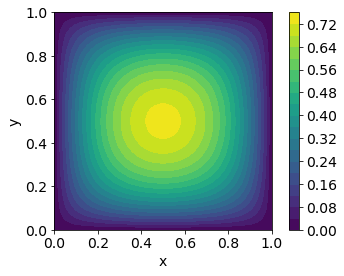

In [39]:

def thomas(l,aa,u,bb) :
    
    a = aa.copy()        # a is modified, but we are reusing a, so make a copy
    b = bb.copy()        # b too
    
    n = np.size(a)
    x = np.zeros(n)
    for i in range(1,n) :
        a[i] = a[i] - l[i]/a[i-1]*u[i-1]
        b[i] = b[i] - l[i]/a[i-1]*b[i-1]
    
    x[n-1] = b[n-1]/a[n-1]
    for i in range(n-2,-1,-1) :
        x[i] = (b[i]-u[i]*x[i+1])/a[i]
    
    return x

#======================================================

f  = np.zeros((nx,ny))

a_x = np.full(nx-2, α*(-2.0/dy/dy-2.0/dx/dx))
u_x = np.full(nx-2, α/dx/dx)
l_x = np.full(nx-2, α/dx/dx)

a_y = np.full(ny-2, α*(-2.0/dy/dy-2.0/dx/dx))
u_y = np.full(ny-2, α/dy/dy)
l_y = np.full(ny-2, α/dy/dy)

for it in range(maxit) :
    
    #------ sweep i lines  (soln in y dir)

    j = np.arange(1,ny-1)
    for i in range(1,nx-1) :
        b_y = S[i,j] - α/dx/dx*( f[i-1,j] + f[i+1,j] )
        f[i,j] = thomas(l_y,a_y,u_y,b_y)

    #------ sweep j lines  (soln in x dir)

    i = np.arange(1,nx-1)
    for j in range(1,ny-1) :
        b_x = S[i,j] - α/dy/dy*( f[i,j-1] + f[i,j+1] )
        f[i,j] = thomas(l_x,a_x,u_x,b_x)

    if check_convergence():
        break

plot_results()


## Jacobi method

number of iterations = 3054


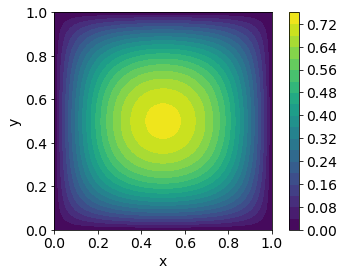

In [40]:
f  = np.zeros((nx,ny))

i = np.arange(1,nx-1)
j = np.arange(1,ny-1)

for it in range(maxit) :
    f[ix(i,j)] = (S[ix(i,j)] - \
                 α*(f[ix(i-1,j)]+f[ix(i+1,j)])/dx/dx - \
                 α*(f[ix(i,j-1)]+f[ix(i,j+1)])/dy/dy) / \
                 (-2*α/dx/dx - 2*α/dy/dy)
    
    if check_convergence():
        break

plot_results()